In [11]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [5]:
img_height = 28
img_width = 28

In [12]:
model = keras.Sequential([
    layers.Input((28,28,1)), #28 * 28 pixels, only 1 color (greyscale)
    layers.Dense(128, activation="relu"), #128 nodes,  activation = rectify linear unit, fast activation function
    layers.Conv2D(16,3, padding='same'), #2d convulution layer
    layers.Conv2D(32,3, padding='same'),
    layers.MaxPooling2D(),#downsamples input so that feature maps can be created. usually added after convulution layer
    layers.Flatten(), #[[1],[2],[3]] --> [1,2,3]
    layers.Dense(3), #representing 3 classes, output layer
])

In [14]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/evanp/AI/Capstone/Training_Images',
    labels='inferred',
    label_mode = "int",
    color_mode='grayscale',
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123, #same seed results in same validation test, good for testing bad for production
    validation_split=0.5,
    subset="training",
)

Found 6 files belonging to 3 classes.
Using 3 files for training.


In [15]:
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/evanp/AI/Capstone/Training_Images',
    labels='inferred',
    label_mode = "int",
    color_mode='grayscale',
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123, #same seed results in same validation test, good for testing bad for production
    validation_split=0.5,
    subset="validation",
)

Found 6 files belonging to 3 classes.
Using 3 files for validation.


In [22]:
#ds_train.shape

def argument(x,y):
    image = tf.image.random_brightness(x, max_delta=0.05)
    return image, y

ds_train = ds_train.map(argument)

#for Custom Loops
for epochs in range(10):
    for x, y in ds_train:
        #TRAIN HERE
        pass

In [23]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[
        keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    ],
    metrics=["accuracy"],
)

model.fit(ds_train, epochs=30, verbose=2) #verbose is just a way to display the data, nothing to do with processing

Epoch 1/30
1/1 - 0s - loss: 4.2436e-05 - accuracy: 1.0000
Epoch 2/30
1/1 - 0s - loss: 36.9507 - accuracy: 0.6667
Epoch 3/30
1/1 - 0s - loss: 4.3710e-07 - accuracy: 1.0000
Epoch 4/30
1/1 - 0s - loss: 3.6494 - accuracy: 0.6667
Epoch 5/30
1/1 - 0s - loss: 19.2390 - accuracy: 0.6667
Epoch 6/30
1/1 - 0s - loss: 11.8018 - accuracy: 0.6667
Epoch 7/30
1/1 - 0s - loss: 6.0199e-04 - accuracy: 1.0000
Epoch 8/30
1/1 - 0s - loss: 5.2491 - accuracy: 0.6667
Epoch 9/30
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/30
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 11/30
1/1 - 0s - loss: 7.2488 - accuracy: 0.6667
Epoch 12/30
1/1 - 0s - loss: 1.8279e-06 - accuracy: 1.0000
Epoch 13/30
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 14/30
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 15/30
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 16/30
1/1 - 0s - loss: 4.2404e-04 - accuracy: 1.0000
Epoch 17/30
1/1 - 0s - loss: 1.3749 - accuracy: 0.6667
Epoch 18/30
1/1 - 0s - loss: 0.

TypeError: Image data of dtype object cannot be converted to float

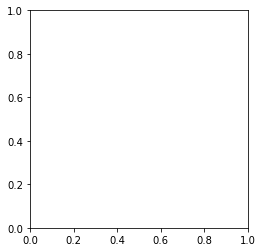

In [25]:
#PREPROCESS
plt.figure()
plt.imshow(ds_train)
plt.colorbar()
plt.grid(False)
plt.show()

ds_train = ds_train / 255.0 #normalizes images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()